In [34]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from common import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
gammas = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135]

In [42]:
modularity = load_modularity_scores(10, gammas, 108)
modularity

,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135
0,0.500217,0.452474,0.409783,0.373248,0.338791,0.307839,0.281035,0.259801,0.246389,0.239313,0.234483,0.231137,0.228761,0.226965,0.225546,0.224532,0.223578,0.222801
1,0.500217,0.452474,0.409618,0.373248,0.338788,0.307746,0.280954,0.259650,0.246366,0.239312,0.234464,0.231077,0.228749,0.226935,0.225535,0.224481,0.223552,0.222794
2,0.500217,0.452474,0.409618,0.373248,0.338781,0.307743,0.280868,0.259620,0.246354,0.239303,0.234459,0.231069,0.228734,0.226888,0.225531,0.224438,0.223540,0.222783
3,0.500217,0.452474,0.409617,0.373225,0.338781,0.307734,0.280845,0.259528,0.246350,0.239254,0.234433,0.231052,0.228724,0.226878,0.225516,0.224434,0.223536,0.222775
4,0.500217,0.452474,0.409593,0.373225,0.338748,0.307719,0.280844,0.259484,0.246350,0.239251,0.234378,0.231047,0.228710,0.226876,0.225510,0.224427,0.223526,0.222767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.500000,0.450000,0.406638,0.371318,0.336883,0.305121,0.278481,0.257451,0.244589,0.237995,0.233448,0.230281,0.227910,0.226188,0.224831,0.223739,0.222980,0.222230
996,0.500000,0.450000,0.406512,0.371301,0.336873,0.305048,0.278472,0.257441,0.244572,0.237992,0.233426,0.230273,0.227864,0.226163,0.224829,0.223733,0.222930,0.222223
997,0.500000,0.450000,0.406184,0.371265,0.336730,0.304973,0.278470,0.257395,0.244557,0.237984,0.233400,0.230257,0.227862,0.226156,0.224753,0.223731,0.222885,0.222213
998,0.500000,0.450000,0.405582,0.371210,0.336601,0.304841,0.278399,0.257160,0.244528,0.237957,0.233395,0.230222,0.227850,0.226144,0.224717,0.223702,0.222864,0.222183


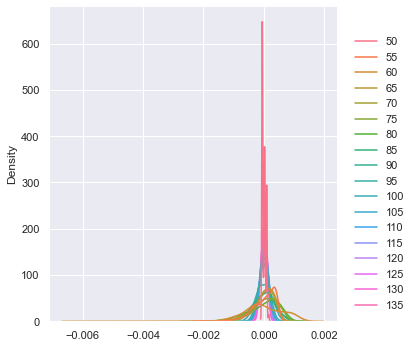

In [43]:
sns.displot(modularity - modularity.mean(), kind="kde", bw_adjust=1)

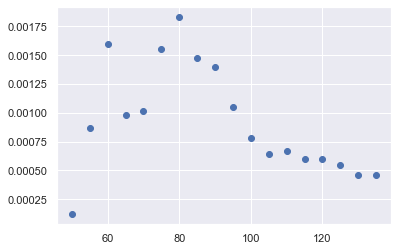

In [45]:
plt.scatter(modularity.columns, modularity.std()/modularity.mean())
#plt.scatter(modularity.columns, modularity.std())

In [253]:
gamma = 55
partitions, _ = load_partitions(10, gamma)
partitions

,ClusterId,PartitionId
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
995,6,997
996,6,998
997,6,999
998,6,1000


In [262]:
sizes = []
gammas = [55, 60, 65, 70, 75]

for gamma in gammas:
    partitions, _ = load_partitions(10, gamma)
    sizes_ = partitions.ClusterId.value_counts().reset_index(drop=True)
    sizes.append(sizes_.values)

sizes = pd.DataFrame(sizes).T
sizes.columns = gammas
sizes.index = np.arange(1, len(sizes) + 1)
sizes

,55,60,65,70,75
1,877.0,136.0,810.0,117.0,102.0
2,69.0,123.0,73.0,87.0,42.0
3,21.0,110.0,21.0,86.0,32.0
4,13.0,108.0,10.0,60.0,29.0
5,12.0,83.0,8.0,48.0,20.0
...,...,...,...,...,...
463,NaN,NaN,NaN,NaN,1.0
464,NaN,NaN,NaN,NaN,1.0
465,NaN,NaN,NaN,NaN,1.0
466,NaN,NaN,NaN,NaN,1.0


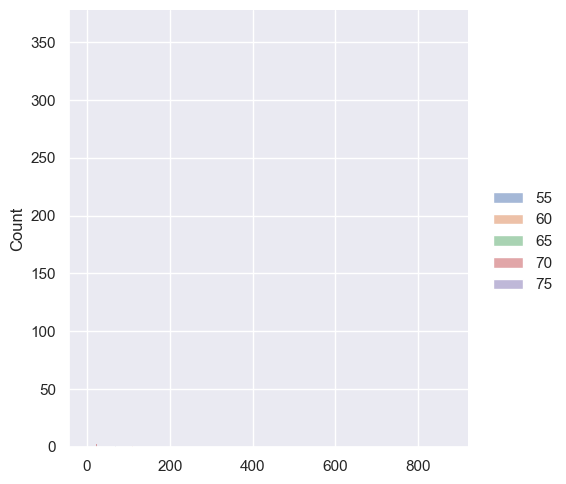

In [263]:
sns.displot(sizes)
plt.yscale("log")
plt.xscale("log")

In [250]:
sizes

,55,60,65,70,75
1,877.0,136.0,810.0,117.0,102.0
2,69.0,123.0,73.0,87.0,42.0
3,21.0,110.0,21.0,86.0,32.0
4,13.0,108.0,10.0,60.0,29.0
5,12.0,83.0,8.0,48.0,20.0
...,...,...,...,...,...
463,NaN,NaN,NaN,NaN,1.0
464,NaN,NaN,NaN,NaN,1.0
465,NaN,NaN,NaN,NaN,1.0
466,NaN,NaN,NaN,NaN,1.0


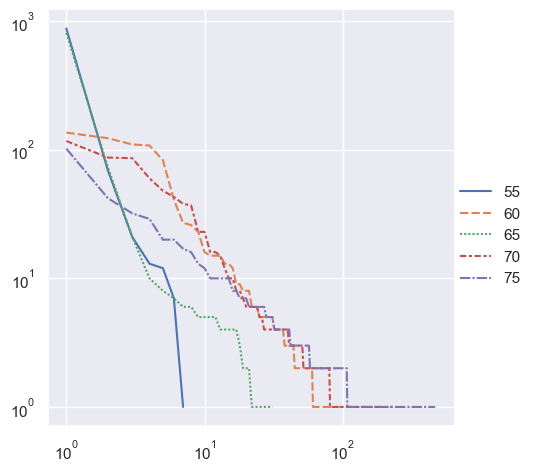

In [264]:
sns.relplot(sizes, kind="line")
plt.xscale("log")
plt.yscale("log")